C:\Users\kamal\AppData\Local\Temp\ipykernel_13292\2883196481.py:32: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  gen_data['DATE_TIME'] = pd.to_datetime(gen_data['DATE_TIME'])


Mean Squared Error: 3400.79


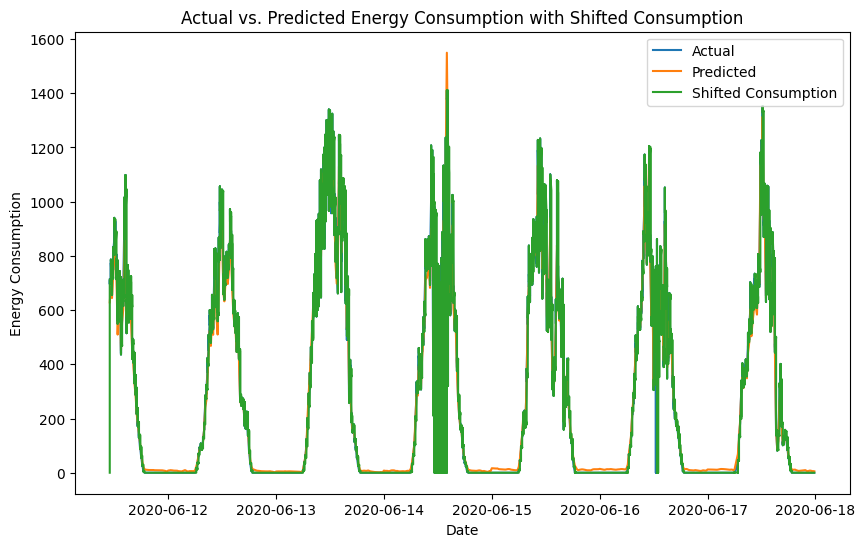

In [21]:
#!/usr/bin/env python
# coding: utf-8

# In[2]:


#project2
#Energy Consumption Prediction and Demand-Side Management:
#Create an AI model that predicts energy consumption patterns for different regions and demographics. 
#Use this information to implement demand-side management strategies that encourage consumers to shift their energy usage
#during off-peak hours, reducing strain on the grid 


# In[1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# In[2]:


gen_data = pd.read_csv('C:/Users/kamal/OneDrive/Desktop/Hackathon/Datasets/Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('C:/Users/kamal/OneDrive/Desktop/Hackathon/Datasets/Plant_1_Weather_Sensor_Data.csv')

# Convert DATE_TIME columns to datetime type
gen_data['DATE_TIME'] = pd.to_datetime(gen_data['DATE_TIME'])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])

# Set DATE_TIME columns as index
gen_data.set_index('DATE_TIME', inplace=True)
weather_data.set_index('DATE_TIME', inplace=True)

# Merge generation and weather data on DATE_TIME
data = gen_data.merge(weather_data, on='DATE_TIME', how='inner')


# In[3]:


# Extract features and target
data['HOUR'] = data.index.hour
data['DAY_WEEK'] = data.index.dayofweek
data['MONTH'] = data.index.month

features = ['IRRADIATION', 'MODULE_TEMPERATURE', 'HOUR', 'DAY_WEEK', 'MONTH']
target = 'AC_POWER'

# Create lag features for energy consumption
data['lag_1'] = data[target].shift(1)
data['lag_2'] = data[target].shift(2)
data['lag_3'] = data[target].shift(3)

# Drop missing values
data.dropna(inplace=True)


# In[4]:


# Split data into train and test sets
train_size = int(0.8 * len(data))
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]


# In[5]:


# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(train_data[features], train_data[target])

# Make predictions on test data
predictions = model.predict(test_data[features])

# Calculate Mean Squared Error
mse = mean_squared_error(test_data[target], predictions)
print(f"Mean Squared Error: {mse:.2f}")


# In[6]:


# Apply demand-side management strategy
def shift_energy_usage(hourly_consumption, shift_hours):
    shifted_consumption = np.roll(hourly_consumption, shift_hours)
    return shifted_consumption

# Example: Shift energy usage by 4 hours to encourage off-peak consumption
shifted_consumption = shift_energy_usage(test_data[target].values, shift_hours=4)


# In[14]:


# Plot actual energy consumption and predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data[target], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.plot(test_data.index, shifted_consumption, label='Shifted Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Actual vs. Predicted Energy Consumption with Shifted Consumption')
plt.legend()
plt.show()


# In[ ]:
